## Klausmeier model

Implementing the Klausmeier ODE System, doing some simulations.

###### [1] Klausmeier, C. A. (1999). Regular and irregular patterns in semiarid vegetation. *Science, 284*(5421), 1826-1828. https://doi.org/10.1126/science.284.5421.1826


In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")

using .Src
using DifferentialEquations, CSV, DataFrames, Plots

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
# define spatially homogeneous version of Klausmeier model
function klausmeier!(du,u,p,t)
 du[1] = -u[1] - u[1] * u[2]^2 + p[1] # water compartment
 du[2] = u[1] * u[2]^2 - p[2] * u[2] # biomass compartment
end

klausmeier! (generic function with 1 method)

### some simulations
goal is to examine which influence choice of w0 has for fixed (a,n0) combination.

In [99]:
u0 = [0.95;1.5]          # initial conditions
tspan = (0.0,150.0)      # start and end point of the time period to be considered
a = 0.79
m = 0.45                # value as in [1]
p = [a;m]

prob = ODEProblem(klausmeier!, u0, tspan, p)
sol = solve(prob,
    saveat=0.1  # consider specific time points
    )

df_sol = DataFrame(time=sol.t, w=sol[1, :], n=sol[2, :]);


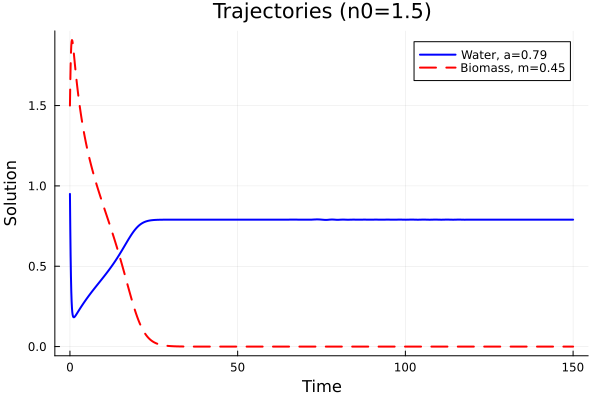

In [100]:
# plot for better visualization
plot(df_sol.time, df_sol.w, label="Water, a=$a", lw=2, color=:blue)
plot!(df_sol.time, df_sol.n, label="Biomass, m=$m", lw=2, linestyle=:dash, color=:red)

xlabel!("Time")
ylabel!("Solution")
title!("Trajectories (n0=$(u0[2]))")

Results:
- as we use only n-trajectory in the computation of the likelihood, we are only interested in how the red curve changes for initial w0 values
- "converges" after few time steps
- differences are not big (visually) for different values of w0

-> for now I use w0=0.95 (i.e. mean across all a values considered)

### test data sampling

test the implementation of the different methods how data observations are obtained depending on M

time window fixed, different sample density M

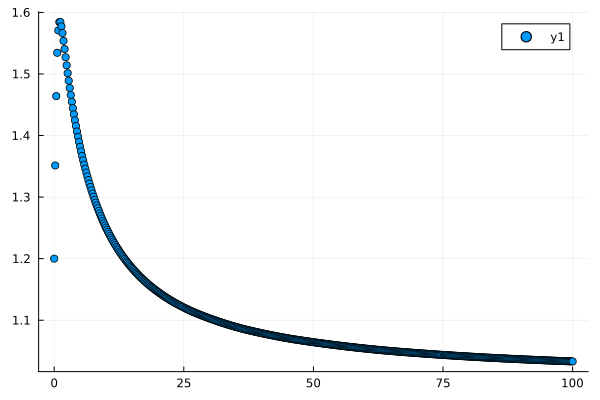

In [8]:
M = 500
hprm = Src.Hyperprm(0.95, 1.2,0.9,0.45,M,0.0)
sol = Src.sol_klausmeier(hprm, t_fixed=true, t_end=100.0)
scatter(sol[!,"time"], sol[!,"n"])

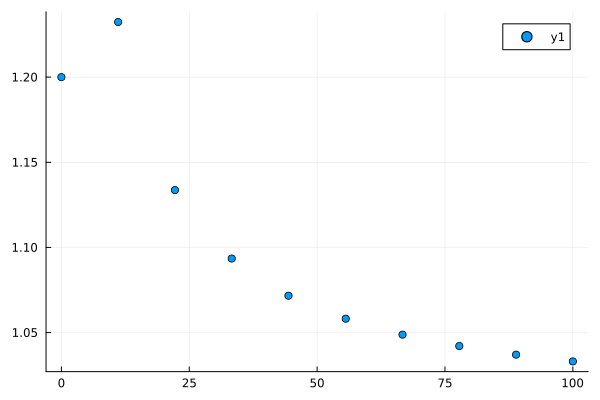

In [10]:
M = 10
hprm = Src.Hyperprm(0.95, 1.2,0.9,0.45,M,0.0)
sol = Src.sol_klausmeier(hprm, t_fixed=true, t_end=100.0)
scatter(sol[!,"time"], sol[!,"n"])

end time variable, make M steps of certain step size

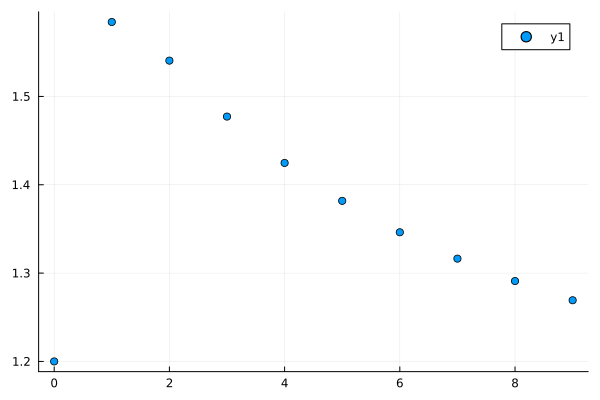

In [26]:
M = 10
hprm = Src.Hyperprm(0.95, 1.2,0.9,0.45,M,0.0)
sol = Src.sol_klausmeier(hprm, t_step=1.0)
scatter(sol[!,"time"], sol[!,"n"])

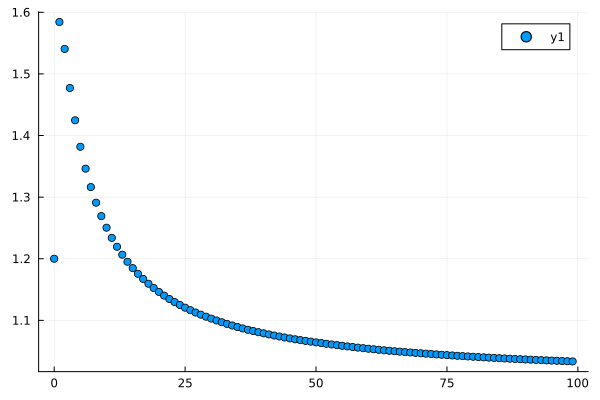

In [28]:
M = 100
hprm = Src.Hyperprm(0.95, 1.2,0.9,0.45,M,0.0)
sol = Src.sol_klausmeier(hprm, t_step=1.0)
scatter(sol[!,"time"], sol[!,"n"])

-> sampling works as intended